In [1]:
import Eastenders_Lib as est
import Subtitle_truthvalue as stv

ModuleNotFoundError: No module named 'Eastenders_Lib'

In [2]:
import pandas as pd

In [3]:
shotdir='Desktop/TrecVid/5082189274976367100.shots1.json'
threads='Desktop/TV-series/video/thread_output1_10_10.json'
manualScen='Desktop/TrecVid/Eastender_manual_segmentation_inSeconds.json'

In [4]:
filename="Desktop/TrecVid/Annotations_5082189274976367100 (times in seconds) - Sheet1.csv"

In [5]:
manualBoundry, shotSeq, shotBondry, data1 =est.preprocessingEastender(manualScen=manualScen,threads=threads)

In [6]:
SpeakerSequence,SpeakerDF,textSent,lematizedText=est.preprocessAnnotationFile(filename)

In [7]:
len(textSent),len(SpeakerDF),len(lematizedText),len(SpeakerSequence)

(2964, 2964, 2964, 2964)

In [8]:
len(shotSeq),len(shotBondry)

(475, 475)

In [13]:
shotSpeakers=[]
shotLabel=[]
pos=0
for j in range(pos,len(SpeakerDF)):
    if pos<len(shotBondry):
        if SpeakerDF['Duration end XML'][j]<=shotBondry[pos]:
            shotSpeakers.append(shotBondry[pos])
            shotLabel.append(shotSeq[pos])
            print(j)
        else:
            shotSpeakers.append(shotBondry[pos])
            shotLabel.append(shotSeq[pos])
            pos=pos+1
            continue
    else:
        break
    

In [15]:
SpeakerDF=pd.DataFrame()

In [16]:
SpeakerDF['shotLabel']=shotLabel
SpeakerDF['shotTime']=shotSpeakers

In [17]:
shotSeq[0],shotBondry[0]

(u'A', 1.4000000000000001)

In [18]:
import uts 

In [19]:
textwithSpeaker=[]
for i in range(len(textSent)):
    textwithSpeaker.append((textSent[i]+' '+str(SpeakerSequence[i])))

In [20]:
modelTexttiling=uts.TextTiling(window=2)
boundryTexttiling=modelTexttiling.segment(textSent)
boundryTexttiling.count(1)

406

In [21]:
modelTexttiling=uts.TextTiling(window=2)
boundryTexttiling=modelTexttiling.segment(textwithSpeaker)
boundryTexttiling.count(1)

422

In [22]:
boundryTexttiling=boundryTexttiling[0:len(truthValueManualSegmentation)]
est.recall_score(boundryTexttiling,truthValueManualSegmentation)

NameError: name 'truthValueManualSegmentation' is not defined

In [102]:
est.precision_score(boundryTexttiling,truthValueManualSegmentation)

0.2288135593220339

In [94]:
modelC99 = uts.C99(window=4)
boundryC99=modelC99.segment(textSent)
len(boundryC99)
boundryC99.count(0)

1764

In [95]:
modelC99 = uts.C99(window=4)
boundryC99=modelC99.segment(textwithSpeaker)
len(boundryC99)
boundryC99.count(0)

2825

In [96]:
boundryC99.count(1)

139

In [98]:
boundryC99=boundryC99[0:len(truthValueManualSegmentation)]

In [99]:
est.recall_score(boundryC99,truthValueManualSegmentation)

0.38848920863309355

In [104]:
est.precision_score(boundryC99,truthValueManualSegmentation)

0.4576271186440678

In [21]:
processeLemma=[]
for i in lematizedText:
    tmpWords=''
    for j in i:
        tmpWords=tmpWords+' '+j
    processeLemma.append(tmpWords)

In [22]:
a=[i for i in processeLemma if len(i)>4]

In [23]:
textwithSpeaker[0:2]

NameError: name 'textwithSpeaker' is not defined

Segmentation choosing values for k and C in segmentation algorithm

In [9]:
scenes=est.segmentation_speakers(SpeakerSequence,7, 3)

In [10]:
len(scenes)

135

In [11]:
scenesShotSequence=est.segmentation_speakers(shotSeq,7,4)

In [12]:
len(scenesShotSequence)

59

In [13]:
sceneShotBoundry=[]
for i in scenesShotSequence:
    sceneShotBoundry.append(shotBondry[i])

In [14]:
sceneShotBoundry[10]

391.40000000000003

In [15]:
sceneSpeakerBoundry=[]
for i in scenes:
    sceneSpeakerBoundry.append(SpeakerDF['Duration end XML'][i])

In [16]:
len(sceneSpeakerBoundry)

135

In [17]:
def truthValueNew(scenesBoundry):
    truthValue=[]
    pos=0
    i=0
    #print('hello')
    # sceneSpeakerBoundry=[]
    # speakerBoundry=list(DF['Duration end XML'])
    # for i in scenes:
    # 	sceneSpeakerBoundry.append(speakerBoundry[i])
    try:
        for x in range(len(SpeakerDF)):
            if SpeakerDF['Duration end XML'][x]<scenesBoundry[pos]:
                truthValue.append(0)
                i=i+1
            else:
                truthValue.append(1)
                if pos <len(scenesBoundry):
                    pos=pos+1
                #i=i+1
                else:
                    break
    except:
        print('finished')
    return truthValue

In [18]:
def shotTruthValue(data,sceneBoundry):
    truthValue=[]
    pos=0
    i=0
    print(len(data['content']))
    try:
        for x in data['content']:
            if x['segment']['end']<sceneBoundry[pos]:
                truthValue.append(0)
                i=i+1
            else:
                truthValue.append(1)
                i=i+1
                if pos <len(sceneBoundry):
                    pos=pos+1
                    continue
                else:
                    break
    except:
        print('error')
    return truthValue,i,pos


Game of Thrones

In [19]:
scenes_dir='/home/berhe/Desktop/LIMSI/TLP_thesis/Scenes/'
subtitle_dir='/home/berhe/Desktop/LIMSI/TLP_thesis/subtitles/'

In [20]:
import os
subtitleFiles=[]
for fl in os.listdir(subtitle_dir):
    if '.en.srt' in fl:
       subtitleFiles.append(fl)

scenesegementedFiles=[]
for fl in os.listdir(scenes_dir):
    if 'Episode' in fl:
       scenesegementedFiles.append(fl)

In [21]:
subtitleFiles.sort()
scenesegementedFiles.sort()

In [22]:
threads='Desktop/TV-series/video/thread_output4_10_10.json'
_, shotSeq, shotBondry, _=est.preprocessingEastender(manualScen=manualScen,threads=threads)

In [23]:
len(shotBondry),len(shotSeq),shotBondry[0]

(566, 566, 1.4000000000000001)

In [24]:
scenesShotSequence=est.segmentation_speakers(shotSeq,4,3)

In [25]:
len(scenesShotSequence)
sceneShotBoundry=[]
for i in scenesShotSequence:
    sceneShotBoundry.append(shotBondry[i])

In [26]:
start=sceneShotBoundry
start=[0.]+start
del start[-1]
len(start)

121

In [27]:
episodeTVM=stv.episodTruthValueMan(scenesegementedFile=scenesegementedFiles[3],subtitleFile=subtitleFiles[3])

In [28]:
len(episodeTVM)

947

In [29]:
episodesTVA=stv.episodTruthValueShot(scene_start=start,scene_end=sceneShotBoundry,subtitleFile=subtitleFiles[3])

In [30]:
len(episodesTVA)

1102

In [44]:
import pickle

In [31]:
episodesTVA=[int(i) for i in episodesTVA]
episodeTVM=[int(i) for i in episodeTVM]

In [48]:
with open("b.txt", "wb") as fp:   #Pickling
    pickle.dump(episodeTVM, fp)

In [285]:
K=(len(episodeTVM)/(2*(episodeTVM.count(1))))

In [286]:
windiffSHot=round(est.windowdiff(episodeTVM,episodesTVA,k=K,boundary=1),2)

pkShot=round(est.pk(episodeTVM,episodesTVA,k=K,boundary=1),2)
ss=episodesTVA
ss1=episodeTVM
if len(ss)<len(ss1):
    t=ss1[0:len(ss)]
    shotRec=round(est.recall_score(ss,t),2)
    shotPr=round(est.precision_score(ss,t),2)
else:
    t=ss[0:len(ss1)]
    shotRec=round(est.recall_score(ss1,t),2)
    shotPr=round(est.precision_score(ss1,t),2)

In [287]:
windiffSHot,pkShot,shotRec,shotPr

(1.53, 0.58, 0.23, 0.07)

In [115]:
K

9

TrecVed

In [18]:
roundedBoundry=pd.read_csv('Desktop/TrecVid/roundedBoundry.txt',sep='\t',header=None)

In [19]:
roundedBoundry.columns

Int64Index([0, 1, 2], dtype='int64')

In [20]:
roundedmanualBoundry=list(roundedBoundry[2])

In [21]:
truthValueSpeakerSequence=truthValueNew(sceneSpeakerBoundry)

In [22]:
truthValueShotSequence,ii,po=shotTruthValue(data1,sceneShotBoundry)

In [23]:
truthValueManualSegmentation=truthValueNew(roundedmanualBoundry)

In [24]:
truthValueManualSegmentationShot,JJ,p=shotTruthValue(data1,roundedmanualBoundry)

In [25]:
len(sceneSpeakerBoundry),len(truthValueSpeakerSequence),len(sceneShotBoundry),len(truthValueShotSequence),len(truthValueManualSegmentation),len(truthValueManualSegmentationShot)

(135, 2937, 217, 1650, 2951, 1604)

In [26]:
truthValueManualSegmentation=[int(i) for i in truthValueManualSegmentation]
truthValueSpeakerSequence=[int(i) for i in truthValueSpeakerSequence]

In [27]:
round(est.windowdiff(truthValueManualSegmentation,truthValueSpeakerSequence,k=3,boundary='1'),2)

0.0

In [28]:
t1=truthValueShotSequence[0:len(truthValueManualSegmentationShot)]

In [29]:
t1=[str(i) for i in t1]
truthValueManualSegmentationShot=[str(i) for i in truthValueManualSegmentationShot]

In [30]:
xlist=[x['segment']['end'] for x in data1['content']]

In [31]:
truthValueSpeakerSequence.count(1),t1.count(1)

(135, 0)

In [32]:
t1=[int(x) for x in t1]
truthValueManualSegmentationShot=[int(x) for x in truthValueManualSegmentationShot]

In [33]:
all(isinstance(n, int) for n in t1)

True

In [34]:
est.recall_score(truthValueManualSegmentationShot,t1)

0.1694915254237288

In [35]:
round(est.windowdiff(truthValueManualSegmentation,truthValueManualSegmentationShot,k=3,boundary='1'),2)

0.0

In [36]:
print(truthValueManualSegmentation[0:30])

In [37]:
ls=[x+1 for x in xlist if x<=roundedmanualBoundry[117] and x>=roundedmanualBoundry[116] ]

In [38]:
len(ls)

43

In [39]:
len(truthValueManualSegmentation),len(truthValueManualSegmentationShot),len(manualBoundry)

(2951, 1604, 118)

In [40]:
kShot=len(shotSeq)/(2*len(scenesShotSequence))
kSpeaker=len(SpeakerSequence)/(2*len(scenes))
#kTexttiling=len(textSent)/(2*boundryTexttiling.count(1))
#kC99=len(textSent)/(2*boundryC99.count(1))
kShot, kSpeaker#, kTexttiling, kC99

(3, 10)

In [41]:
pkResultShot=est.pk(truthValueManualSegmentationShot,truthValueShotSequence,k=kShot,boundary='1')
pkResultSpeaker=est.pk(truthValueManualSegmentation,truthValueSpeakerSequence,k=kSpeaker,boundary='1')
#pkTexttiling=est.pk(truthValueManualSegmentation,boundryTexttiling,k=kTexttiling,boundary='1')
#pkC99=est.pk(truthValueManualSegmentation,boundryC99,k=kC99,boundary='1')

pkResultShot,pkResultSpeaker#,pkTexttiling,pkC99

(0.0, 0.0)

In [42]:
windiffSHot=est.windowdiff(truthValueManualSegmentationShot,truthValueShotSequence,k=kShot,boundary='1')
windiffSpeaker=est.windowdiff(truthValueManualSegmentation,truthValueSpeakerSequence,k=kSpeaker,boundary='1')
#windowdiffText=est.windowdiff(truthValueManualSegmentation,boundryTexttiling,k=kTexttiling,boundary='1')
#windiffC99=est.windowdiff(truthValueManualSegmentation,boundryC99,k=kC99,boundary='1')
windiffSHot,windiffSpeaker#,windowdiffText,windiffC99

(0.0, 0.0)

In [48]:
def precision(ref, hyp, k=10):
    if len(hyp)>k:
        hyp = hyp[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(hyp):
        if p in ref and p not in hyp[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not ref:
        return 0.0

    return score / min(len(ref), k)

In [49]:
def recall(ref, hyp):
    tp =0
    fp = 0
    length=0
    if len(ref)>len(hyp):
        lenght=len(hyp)
    else:
        length=len(ref)
        
    for i in range(length):
        if hyp[i] == '1':
            if ref[i] == '1':
                tp += 1
            else:
                fp +=1

    tn =0
    fn = 0
    for i in range(length):
        if hyp[i] == '0':
            if ref[i] == '0':
                tn += 1
            else:
                fn +=1
    if (tp!=0 or fn!=0):
        return (tp/float((tp+fn)))
    else:
        return 0

In [39]:
recall(truthValueManualSegmentationShot,truthValueShotSequence)

NameError: name 'truthValueManualSegmentationShot' is not defined

In [46]:
recall(truthValueSpeakerSequence,truthValueManualSegmentationShot)

0

In [47]:
truthValueShotSequence[0:10],truthValueManualSegmentation[0:10]

([0, 1, 0, 0, 0, 1, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
kvaluies=[]
cvalues=[]
windiffSHotA=[]
windiffSpeakerA=[]
pkShotA=[]
pkSpeakerA=[]
recallShot=[]
recallSpeaker=[]
metRecA=[]
metPrA=[]
shotRecA=[]
shotPrA=[]
sceneShot=[]
sceneSP=[]
for k in range(4, 15):
    for c in range(3,11):
        if c<k:
            scenesShotSequence=est.segmentation_speakers(shotSeq,k,c)
            scenes=est.segmentation_speakers(SpeakerSequence,k, c)
            sceneShotBoundry=[]
            for i in scenesShotSequence:
                sceneShotBoundry.append(shotBondry[i])
            truthValueShotSequence,_=est.shotTruthValue(data1,sceneShotBoundry)
            truthValueSpeakerSequence=truthValueNew(scenes)
            kShot=len(shotSeq)/(2*len(scenesShotSequence))
            kSpeaker=len(SpeakerSequence)/(2*len(scenes))
            windiffSHot=round(est.windowdiff(truthValueManualSegmentationShot,truthValueShotSequence,k=kShot,boundary='1'),2)
            #windiffSpeaker=round(est.windowdiff(truthValueManualSegmentation,truthValueSpeakerSequence,k=kSpeaker,boundary='1'),2)
            pkShot=round(est.pk(truthValueManualSegmentationShot,truthValueShotSequence,k=kShot,boundary='1'),2)
            recallshot=round(recall(truthValueManualSegmentationShot,truthValueShotSequence),2)
            recallspeaker=round(recall(truthValueManualSegmentation,truthValueSpeakerSequence),2)
            
            if len(truthValueSpeakerSequence)<len(truthValueManualSegmentation):
                t=truthValueManualSegmentation[0:len(truthValueSpeakerSequence)]
                metRec=round(est.recall_score(t,truthValueSpeakerSequence),2)
                metPr=round(est.precision_score(t,truthValueSpeakerSequence),2)
            else:
                t=truthValueSpeakerSequence[0:len(truthValueManualSegmentation)]
                metRec=round(est.recall_score(truthValueManualSegmentation,t),2)
                metPr=round(est.precision_score(truthValueManualSegmentation,t),2)
            
            ss=[int(i) for i in truthValueShotSequence]
            ss1=[int(i) for i in truthValueManualSegmentationShot]
            if len(ss)<len(ss1):
                t=ss1[0:len(ss)]
                shotRec=round(est.recall_score(t,ss),2)
                shotPr=round(est.precision_score(t,ss),2)
            else:
                t=ss[0:len(ss1)]
                shotRec=round(est.recall_score(ss1,t),2)
                shotPr=round(est.precision_score(ss1,t),2)
            
            tt=[str(i) for i in truthValueManualSegmentation]
            tt1=[str(i) for i in truthValueSpeakerSequence]
            
            windiffSpeaker=round(est.windowdiff(tt1,tt,k=kSpeaker,boundary='1'),2)
            pkSpeaker=round(est.pk(tt1,tt,k=kSpeaker,boundary='1'),2)
            #metRec=est.recall_score(truthValueManualSegmentation,truthValueSpeakerSequence)
            #metPr=est.precision_score(truthValueManualSegmentation,truthValueSpeakerSequence)
            
            kvaluies.append(k)
            cvalues.append(c)
            windiffSHotA.append(windiffSHot)
            windiffSpeakerA.append(windiffSpeaker)
            pkShotA.append(pkShot)
            pkSpeakerA.append(pkSpeaker)
            recallShot.append(recallshot)
            recallSpeaker.append(recallspeaker)
            metRecA.append(metRec)
            metPrA.append(metPr)
            shotRecA.append(shotRec)
            shotPrA.append(shotPr)
            sceneShot.append(len(scenesShotSequence))
            sceneSP.append(len(scenes))
        else:
            print k
            break

In [49]:
resulDF=pd.DataFrame()

In [50]:
#resulDF['K']=kvaluies
resulDF['C']=cvalues
resulDF['wdSH']=windiffSHotA
resulDF['pkSh']=pkShotA
resulDF['wdSP']=windiffSpeakerA
resulDF['pkSP']=pkSpeakerA
#resulDF['rSh']=recallShot
resulDF['spRec']=metRecA
resulDF['spPr']=metPrA
resulDF['shotRec']=shotRecA
resulDF['shotPr']=shotPrA
resulDF['sceneShot']=sceneShot
resulDF['sceneSP']=sceneSP

In [51]:
resulDF=resulDF.round(2)

In [52]:
resulDF

,C,wdSH,pkSh,wdSP,pkSP,spRec,spPr,shotRec,shotPr,sceneShot,sceneSP
0,3,2.21,0.96,0.90,0.52,0.45,0.15,0.26,0.10,340,152
1,3,2.14,0.96,0.93,0.50,0.46,0.16,0.25,0.09,329,147
2,4,1.45,0.89,0.76,0.45,0.39,0.20,0.16,0.09,225,99
3,3,2.10,0.95,0.88,0.50,0.38,0.13,0.24,0.09,323,141
4,4,1.41,0.89,0.79,0.44,0.36,0.19,0.14,0.08,219,95
5,5,1.14,0.82,0.70,0.39,0.29,0.21,0.14,0.10,176,73
6,3,2.09,0.95,0.85,0.50,0.38,0.14,0.23,0.09,322,135
7,4,1.40,0.89,0.78,0.42,0.36,0.20,0.14,0.08,217,92
8,5,1.09,0.79,0.71,0.40,0.24,0.17,0.15,0.11,170,71
9,6,0.85,0.69,0.65,0.28,0.16,0.15,0.09,0.09,133,55


In [53]:
resulDF.min(axis=None, skipna=None, level=None, numeric_only=None)

C             3.00
wdSH          0.45
pkSh          0.41
wdSP          0.62
pkSP          0.12
spRec         0.10
spPr          0.13
shotRec       0.06
shotPr        0.08
sceneShot    71.00
sceneSP      28.00
dtype: float64

In [54]:
resulDF.max(axis=None, skipna=None, level=None, numeric_only=None)

C             10.00
wdSH           2.21
pkSh           0.96
wdSP           1.08
pkSP           0.52
spRec          0.46
spPr           0.35
shotRec        0.26
shotPr         0.12
sceneShot    340.00
sceneSP      152.00
dtype: float64

In [87]:
import matplotlib.pyplot as plt

In [ ]:
resulDF[['cvalues','windiffSHot','windiffSpeaker']].plot(x='cvalues',linestyle='-')

In [88]:
def drawBoundry(a,b,c=1):
    boundry1=sceneSpeakerBoundry[a:b]
    boundry2=sceneShotBoundry[a:b]
    manBound=manualBoundry[a:b]
    if c==1:
        for segment in boundry1:
            plt.plot([segment, segment], [-10, -0.5], 'r')
        for segment in manBound:
            plt.plot([segment, segment], [0.5, 10], 'g')
        plt.ylim(-11, 11);
        plt.xlim(0, segment);
        plt.xlabel('Time (seconds)');
    else:
        for segment in boundry2:
            plt.plot([segment, segment], [-10, -0.5], 'y')
        for segment in manBound:
            plt.plot([segment, segment], [0.5, 10], 'g')
        plt.ylim(-6, 6);
        plt.xlim(0, segment);
        plt.xlabel('Time (seconds)');

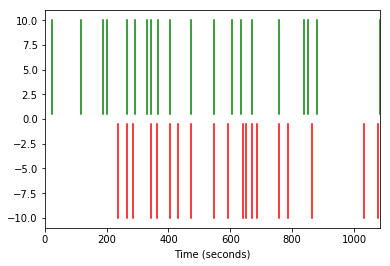

In [89]:
drawBoundry(0,20,1)

In [ ]:
len(sceneSpeakerBoundry),len(sceneSpeakerBoundry),len(manualBoundry)

In [143]:
import numpy as np
def find_nearest(listBoundry, value):
    array = np.asarray(listBoundry)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [145]:
boundryRoundOff=[]
for i in manualBoundry:
    boundryRoundOff.append(find_nearest(shotBondry,i))

In [146]:
len(boundryRoundOff)

118

In [149]:
manualBoundry[2],shotBondry[0],boundryRoundOff[2]

(190, 24.6, 189.64000000000001)

In [144]:
find_nearest(shotBondry,manualBoundry[1])

117.12

In [150]:
timingDF=pd.DataFrame(columns=('manualBoundry','roundedShot'))

In [151]:
timingDF.manualBoundry=manualBoundry
timingDF.roundedShot=boundryRoundOff

In [66]:
roundedmanualBoundry=roundedBoundry[2]

In [ ]:
def segmentationAlgo(sequence, sequenceBoundry):
    tempList=[]
    currentSpeaker=[]
    nextSpeakers=[]
    sepPosition=[]
    for i in sequence:

In [ ]:
def segmentation_speakers(speakerSequence,k,C):
    tempList=[]
    sepPosition=[]
    count=0
    tempList.append(speakerSequence[0:2])
    for i in range(2,len(speakerSequence)):
        if speakerSequence[i]==tempList[-1]:
            continue
        if speakerSequence[i] in tempList:
            tempList.pop(0)
            tempList.append(speakerSequence[i])
            count=0
        else:
            count=count+1
            if len(tempList)<k:
                tempList.append(speakerSequence[i])
            if count==C:
                tempList=tempList[C-1:]
                sepPosition.append(i-C)
                count=0
    return sepPosition